# **Step4a -> "Transformación de datos"**

##wd

In [112]:
working_dir = "../data"
working_dir

'../data'

In [113]:
import pandas as pd

## Archivo de datos: **data_post_step3.csv**


In [114]:
# Cargamos los datos limpios del Step 3
df = pd.read_csv("../data/data_post_step3.csv")
print(df.shape)
df.head()

(251817, 12)


,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,fecha_adquisicion,fecha_inscripcion_sunarp,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen
0,natural,pequeno,ANCON,100.0,2022-12-24,2022-12-29,camioneta,b1234_pickup_otros,FORD,BRONCO SPORT BIG BEND 4X4,149323.8,126060
1,natural,pequeno,ANCON,100.0,2024-04-20,2024-05-15,camioneta,b1234_pickup_otros,CHEVROLET,N400 1.5 MT PASAJEROS BASE,52462.5,48930
2,natural,pequeno,ANCON,100.0,2023-04-28,2023-05-30,camioneta,b1234_pickup_otros,PEUGEOT,3008 GT LINE 1.6 THP EAT6 165,158062.8,136190
3,soc_conyugal,pequeno,ANCON,100.0,2022-09-23,2022-10-27,automovil,a2_1051_1500cc,HYUNDAI,GRAND I10 GL,58068.2,40850
4,natural,pequeno,ANCON,100.0,2023-05-30,2023-06-02,camioneta,b1234_pickup_otros,JETOUR,X70 1.5T MEC 4X2 CONFORT,58217.6,64070


In [115]:
# ...existing code...
# Para ver todas las filas duplicadas agrupadas juntas para comparación
duplicados_agrupados = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
print("Filas duplicadas agrupadas (filas idénticas aparecen juntas):")
duplicados_agrupados.head(5)  # Muestra las primeras 20 filas duplicadas

Filas duplicadas agrupadas (filas idénticas aparecen juntas):


,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,fecha_adquisicion,fecha_inscripcion_sunarp,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen
4013,juridica,grande,ATE,100.0,2022-02-17,2022-04-01,camion,c1_camiones,HYUNDAI,HD60 TDI CRDI EURO IV,141394.8,104820
6412,juridica,grande,ATE,100.0,2022-02-17,2022-04-01,camion,c1_camiones,HYUNDAI,HD60 TDI CRDI EURO IV,141394.8,104820
501,juridica,grande,ATE,100.0,2022-04-30,2022-05-16,automovil,a2_1051_1500cc,TOYOTA,ETIOS 1.5 MT,52608.0,50830
12632,juridica,grande,ATE,100.0,2022-04-30,2022-05-16,automovil,a2_1051_1500cc,TOYOTA,ETIOS 1.5 MT,52608.0,50830
3010,juridica,grande,ATE,100.0,2022-05-31,2022-06-23,camioneta,b1234_pickup_otros,KIA,K2500 2.5 MT CRDI TCI 4WD C/S,78985.9,72430


In [116]:
# Para ver el número de ocurrencias por grupo de filas idénticas
conteo_duplicados = df.groupby(list(df.columns)).size().reset_index(name='conteo')
conteo_duplicados = conteo_duplicados[conteo_duplicados['conteo'] > 1]
print(f"\nGrupos de filas duplicadas con su conteo ({len(conteo_duplicados)} grupos):")
conteo_duplicados.head(5)


Grupos de filas duplicadas con su conteo (2783 grupos):


,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,fecha_adquisicion,fecha_inscripcion_sunarp,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen,conteo
105,juridica,grande,ATE,100.0,2022-02-17,2022-04-01,camion,c1_camiones,HYUNDAI,HD60 TDI CRDI EURO IV,141394.80,104820,2
196,juridica,grande,ATE,100.0,2022-04-30,2022-05-16,automovil,a2_1051_1500cc,TOYOTA,ETIOS 1.5 MT,52608.00,50830,2
238,juridica,grande,ATE,100.0,2022-05-31,2022-06-23,camioneta,b1234_pickup_otros,KIA,K2500 2.5 MT CRDI TCI 4WD C/S,78985.90,72430,2
385,juridica,grande,ATE,100.0,2022-09-19,2022-10-03,camioneta,b1234_pickup_otros,TOYOTA,HILUX DC 4X4 1GD SRV MT,143280.04,137520,2
484,juridica,grande,ATE,100.0,2022-11-08,2022-12-28,automovil,a2_1051_1500cc,TOYOTA,ETIOS 1.5 MT GNV,50050.00,48230,2


In [117]:
df.dtypes

tipo_persona                   object
tipo_contribuyente             object
distrito_fiscal                object
porcentaje_propiedad          float64
fecha_adquisicion              object
fecha_inscripcion_sunarp       object
clase_vehiculo                 object
categoria_vehiculo             object
marca                          object
modelo                         object
valor_adquisicion_pen         float64
valor_referencial_2025_pen      int64
dtype: object

## Creación de variables en base a existentes

Se crearan algunas variables que resultan interesantes por la naturaleza del negocio

In [118]:
df['fecha_adquisicion'] = pd.to_datetime(df['fecha_adquisicion'], errors='coerce')
df['fecha_inscripcion_sunarp'] = pd.to_datetime(df['fecha_inscripcion_sunarp'], errors='coerce')

In [119]:
df['anio_inscripcion_sunarp'] = df['fecha_inscripcion_sunarp'].dt.year

df['anios_desde_inscripcion'] = 2025 - df['anio_inscripcion_sunarp']

df.drop(columns=['anio_inscripcion_sunarp', 'fecha_adquisicion', 'fecha_inscripcion_sunarp'], inplace=True)

df.head()

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,FORD,BRONCO SPORT BIG BEND 4X4,149323.8,126060,3
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,CHEVROLET,N400 1.5 MT PASAJEROS BASE,52462.5,48930,1
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,PEUGEOT,3008 GT LINE 1.6 THP EAT6 165,158062.8,136190,2
3,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,HYUNDAI,GRAND I10 GL,58068.2,40850,3
4,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,JETOUR,X70 1.5T MEC 4X2 CONFORT,58217.6,64070,2


In [120]:
# Ver porcentajes de la categoría 'modelo'
porcentajes_modelo = df['modelo'].value_counts(normalize=True) * 100
print("Porcentajes de cada modelo:")
porcentajes_modelo.head(10)

Porcentajes de cada modelo:


modelo
OTROS MODELOS TRACCIÓN SIMPLE    4.073196
HILUX DC 4X4 1GD SR              2.134884
OTROS MODELOS                    1.992717
ETIOS 1.5 MT                     1.468924
SOLUTO 1.4 MT LX PLUS            1.208417
OTROS MODELOS TRACCIÓN DOBLE     1.184590
AVANZA 1.5 MT                    1.103579
NEW TUCSON GL                    1.041629
CRETA GL                         0.943542
H100 TRUCK GL 2.5 CRDI           0.872856
Name: proportion, dtype: float64

Se analizara crear agrupaciones en la variable modelo, ahora ya parece tener agruapaciones representativas en "otros"

Variables numéricas: ['porcentaje_propiedad', 'valor_adquisicion_pen', 'valor_referencial_2025_pen']


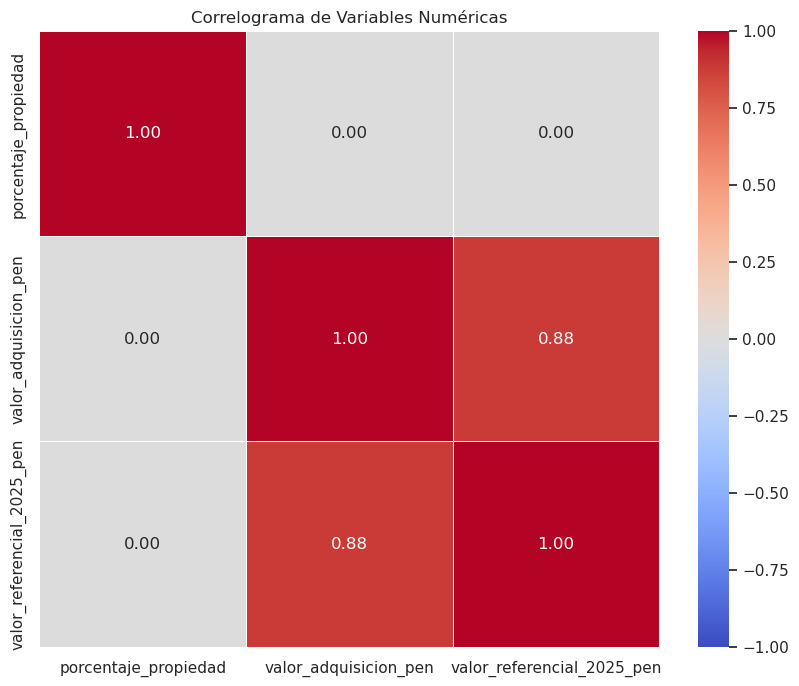

In [121]:
# ...existing code...
# Correlograma de variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Variables numéricas:", list(numerical_cols))

# Calcular matriz de correlación
corr_matrix = df[numerical_cols].corr()

# Crear heatmap con escala fija de -1 a 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlograma de Variables Numéricas')
plt.show()

Se crea la variable base imponible que es la mayor entre el valor de adquisicion y referencial, esta sirve para calcular el impuesto (lógica de negocios)

In [122]:
# Calcular la base imponible como el máximo entre valor referencial y valor adquisición
df['base_imponible'] = df[['valor_referencial_2025_pen', 'valor_adquisicion_pen']].max(axis=1)

# Calcular la base imponible máxima
base_imponible_max = df['base_imponible'].max()
print(f"La base imponible máxima es: {base_imponible_max}")

# Para ver el registro con la base imponible máxima
registro_max = df.loc[df['base_imponible'].idxmax()]
print("\nRegistro con la base imponible máxima:")
print(registro_max)

La base imponible máxima es: 8110658.85

Registro con la base imponible máxima:
tipo_persona                       soc_conyugal
tipo_contribuyente                      pequeno
distrito_fiscal               SANTIAGO DE SURCO
porcentaje_propiedad                      100.0
clase_vehiculo                           camion
categoria_vehiculo                  c1_camiones
marca                                  KENWORTH
modelo                                     T800
valor_adquisicion_pen                8110658.85
valor_referencial_2025_pen               481320
anios_desde_inscripcion                       3
base_imponible                       8110658.85
Name: 220926, dtype: object


In [123]:
df.head()

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,FORD,BRONCO SPORT BIG BEND 4X4,149323.8,126060,3,149323.8
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,CHEVROLET,N400 1.5 MT PASAJEROS BASE,52462.5,48930,1,52462.5
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,PEUGEOT,3008 GT LINE 1.6 THP EAT6 165,158062.8,136190,2,158062.8
3,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,HYUNDAI,GRAND I10 GL,58068.2,40850,3,58068.2
4,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,JETOUR,X70 1.5T MEC 4X2 CONFORT,58217.6,64070,2,64070.0


In [124]:
# Agrupar marcas: mantener las que tienen ≥1%, el resto a 'Otros'
total_registros = len(df)
umbral = 0.01 * total_registros  # 1% del total
print(f"Total registros: {total_registros}, Umbral (1%): {umbral}")

marcas_frecuentes = df['marca'].value_counts()
marcas_a_mantener = marcas_frecuentes[marcas_frecuentes >= umbral].index.tolist()
print(f"Marcas a mantener: {marcas_a_mantener}")

df['marca_agrupada'] = df['marca'].apply(lambda x: x if x in marcas_a_mantener else 'OTROS')

# Ver la distribución de la nueva variable
print("\nDistribución de 'marca_agrupada':")
print(df['marca_agrupada'].value_counts(normalize=True) * 100)

Total registros: 251817, Umbral (1%): 2518.17
Marcas a mantener: ['TOYOTA', 'HYUNDAI', 'KIA', 'DFSK', 'CHEVROLET', 'NISSAN', 'CHANGAN', 'SUZUKI', 'VOLKSWAGEN', 'JAC', 'HONDA', 'MITSUBISHI', 'FORD', 'CHERY', 'MAZDA', 'VOLVO', 'SUBARU', 'MERCEDES BENZ', 'GEELY', 'JETOUR', 'MG', 'FOTON']

Distribución de 'marca_agrupada':
marca_agrupada
OTROS            16.236791
TOYOTA           14.718228
HYUNDAI           8.940620
KIA               8.700366
DFSK              5.442047
CHEVROLET         5.089013
NISSAN            4.232836
CHANGAN           3.915542
SUZUKI            3.381424
VOLKSWAGEN        3.311135
JAC               2.647160
HONDA             2.593153
MITSUBISHI        2.590373
FORD              2.474813
CHERY             2.295318
MAZDA             2.016941
VOLVO             1.904955
SUBARU            1.839828
MERCEDES BENZ     1.707986
GEELY             1.679791
JETOUR            1.471704
MG                1.439537
FOTON             1.370440
Name: proportion, dtype: float64


In [125]:
df.head(10)

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,marca,modelo,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,marca_agrupada
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,FORD,BRONCO SPORT BIG BEND 4X4,149323.8,126060,3,149323.8,FORD
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,CHEVROLET,N400 1.5 MT PASAJEROS BASE,52462.5,48930,1,52462.5,CHEVROLET
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,PEUGEOT,3008 GT LINE 1.6 THP EAT6 165,158062.8,136190,2,158062.8,OTROS
3,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,HYUNDAI,GRAND I10 GL,58068.2,40850,3,58068.2,HYUNDAI
4,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,JETOUR,X70 1.5T MEC 4X2 CONFORT,58217.6,64070,2,64070.0,JETOUR
5,soc_conyugal,pequeno,ANCON,100.0,automovil,a2_1051_1500cc,KIA,SOLUTO,52503.0,49730,2,52503.0,KIA
6,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,HONDA,CR-V EX-L,157811.5,131910,3,157811.5,HONDA
7,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,SUBARU,CROSSTREK AWD 2.0 CVT,101721.6,101670,1,101721.6,SUBARU
8,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,HYUNDAI,VENUE GLS,85462.0,62120,2,85462.0,HYUNDAI
9,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,MITSUBISHI,L200 4X4 2.4 TD GLX MT,113062.3,110150,2,113062.3,MITSUBISHI


In [126]:
df.drop(columns=['marca'], inplace=True)

In [127]:
df.drop(columns=['modelo'], inplace=True)

In [129]:
df.describe()

,porcentaje_propiedad,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible
count,251817.000000,2.518170e+05,2.518170e+05,251817.000000,2.518170e+05
mean,97.980413,1.221931e+05,9.935544e+04,1.985835,1.250581e+05
std,9.956788,1.440493e+05,9.237561e+04,0.801196,1.442248e+05
min,1.000000,0.000000e+00,3.030000e+03,1.000000,3.170000e+03
25%,100.000000,5.988990e+04,5.270000e+04,1.000000,6.198374e+04
50%,100.000000,8.333115e+04,7.159000e+04,2.000000,8.529290e+04
75%,100.000000,1.264428e+05,1.061100e+05,3.000000,1.282667e+05
max,100.000000,8.110659e+06,1.427600e+06,3.000000,8.110659e+06


## Log transform

In [130]:
df.describe()

,porcentaje_propiedad,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible
count,251817.000000,2.518170e+05,2.518170e+05,251817.000000,2.518170e+05
mean,97.980413,1.221931e+05,9.935544e+04,1.985835,1.250581e+05
std,9.956788,1.440493e+05,9.237561e+04,0.801196,1.442248e+05
min,1.000000,0.000000e+00,3.030000e+03,1.000000,3.170000e+03
25%,100.000000,5.988990e+04,5.270000e+04,1.000000,6.198374e+04
50%,100.000000,8.333115e+04,7.159000e+04,2.000000,8.529290e+04
75%,100.000000,1.264428e+05,1.061100e+05,3.000000,1.282667e+05
max,100.000000,8.110659e+06,1.427600e+06,3.000000,8.110659e+06


In [131]:
import numpy as np

df['valor_adquisicion_log'] = np.log1p(df['valor_adquisicion_pen'])
df['valor_referencial_log'] = np.log1p(df['valor_referencial_2025_pen'])
df['base_imponible_log'] = np.log1p(df['base_imponible'])

In [132]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['valor_adquisicion_scaled','valor_referencial_scaled','base_imponible_scaled']] = scaler.fit_transform(
    df[['valor_adquisicion_log','valor_referencial_log','base_imponible_log']]
)


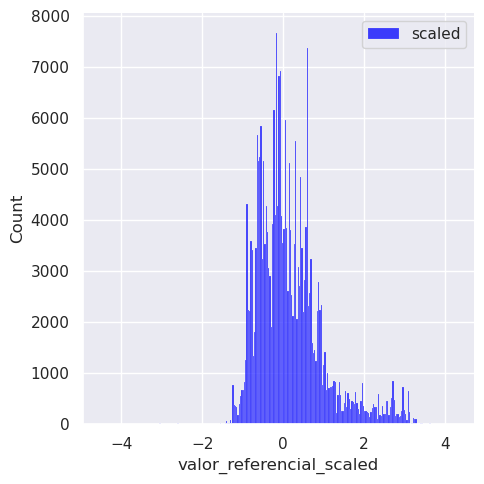

In [133]:
sns.set(style="darkgrid")
sns.displot(df["valor_referencial_scaled"], color="blue", label="scaled")

plt.legend()
plt.show()

## Variables dummies

In [134]:
df.head(3)

,tipo_persona,tipo_contribuyente,distrito_fiscal,porcentaje_propiedad,clase_vehiculo,categoria_vehiculo,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,marca_agrupada,valor_adquisicion_log,valor_referencial_log,base_imponible_log,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
0,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,149323.8,126060,3,149323.8,FORD,11.913879,11.744521,11.913879,0.780557,0.808453,0.770073
1,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,52462.5,48930,1,52462.5,CHEVROLET,10.867873,10.798166,10.867873,-0.619207,-0.543770,-0.668268
2,natural,pequeno,ANCON,100.0,camioneta,b1234_pickup_otros,158062.8,136190,2,158062.8,OTROS,11.970754,11.821814,11.970754,0.856667,0.918894,0.848280


In [135]:
df['porcentaje_propiedad_cat'] = np.where(df['porcentaje_propiedad'] == 100, '100%', '<100%')
tipo_propiedad_dummies = pd.get_dummies(df['porcentaje_propiedad_cat'], prefix='propiedad')
df = pd.concat([df, tipo_propiedad_dummies], axis=1)
df = df.drop(['porcentaje_propiedad', 'porcentaje_propiedad_cat'], axis=1)

In [136]:
df['tipo_persona'].value_counts(sort=False)

tipo_persona
natural          106047
soc_conyugal      53589
juridica          92136
suc_indivisa          5
menores_edad          5
soc_irregular        35
Name: count, dtype: int64

In [137]:
# Generar dummies para las variables categóricas
categorical_cols = ['tipo_persona', 'tipo_contribuyente', 'distrito_fiscal', 'clase_vehiculo', 'categoria_vehiculo', 'marca_agrupada']

# Crear dummies 
dummies = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)

# Crear df_transform: quitar las columnas categóricas originales y agregar las dummies
df_transform = pd.concat([
    df.drop(columns=categorical_cols), 
    dummies
], axis=1)

print(f"Shape de df_transform: {df_transform.shape}")
df_transform.head(10)

Shape de df_transform: (251817, 106)


,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,valor_adquisicion_log,valor_referencial_log,base_imponible_log,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled,...,marca_agrupada_MERCEDES BENZ,marca_agrupada_MG,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO
0,149323.8,126060,3,149323.8,11.913879,11.744521,11.913879,0.780557,0.808453,0.770073,...,False,False,False,False,False,False,False,False,False,False
1,52462.5,48930,1,52462.5,10.867873,10.798166,10.867873,-0.619207,-0.543770,-0.668268,...,False,False,False,False,False,False,False,False,False,False
2,158062.8,136190,2,158062.8,11.970754,11.821814,11.970754,0.856667,0.918894,0.848280,...,False,False,False,False,True,False,False,False,False,False
3,58068.2,40850,3,58068.2,10.969391,10.617687,10.969391,-0.483356,-0.801653,-0.528673,...,False,False,False,False,False,False,False,False,False,False
4,58217.6,64070,2,64070.0,10.971960,11.067747,11.067747,-0.479917,-0.158573,-0.393425,...,False,False,False,False,False,False,False,False,False,False
5,52503.0,49730,2,52503.0,10.868645,10.814384,10.868645,-0.618174,-0.520598,-0.667207,...,False,False,False,False,False,False,False,False,False,False
6,157811.5,131910,3,157811.5,11.969163,11.789883,11.969163,0.854538,0.873269,0.846092,...,False,False,False,False,False,False,False,False,False,False
7,101721.6,101670,1,101721.6,11.530005,11.529497,11.530005,0.266857,0.501210,0.242215,...,False,False,False,False,False,True,False,False,False,False
8,85462.0,62120,2,85462.0,11.355839,11.036839,11.355839,0.033788,-0.202736,0.002723,...,False,False,False,False,False,False,False,False,False,False
9,113062.3,110150,2,113062.3,11.635703,11.609607,11.635703,0.408302,0.615678,0.387559,...,False,False,True,False,False,False,False,False,False,False


## Guardamos los datos transformados

In [138]:
print(f"Shape datos transformados: {df_transform.shape}")
df_transform.head(3)

Shape datos transformados: (251817, 106)


,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,valor_adquisicion_log,valor_referencial_log,base_imponible_log,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled,...,marca_agrupada_MERCEDES BENZ,marca_agrupada_MG,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO
0,149323.8,126060,3,149323.8,11.913879,11.744521,11.913879,0.780557,0.808453,0.770073,...,False,False,False,False,False,False,False,False,False,False
1,52462.5,48930,1,52462.5,10.867873,10.798166,10.867873,-0.619207,-0.543770,-0.668268,...,False,False,False,False,False,False,False,False,False,False
2,158062.8,136190,2,158062.8,11.970754,11.821814,11.970754,0.856667,0.918894,0.848280,...,False,False,False,False,True,False,False,False,False,False


In [139]:
# Guardar para siguiente step
df_transform.to_csv(f'{working_dir}/datos_post_step4a.csv', index=False, encoding='utf-8')